This script is the replication of Li, Rong, and Zhao's work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time

In [2]:
a = 1.5
b = 1
r = 0.3
mu = 0.5
sigma = 0.3
rho0 = -0.5
theta = 0.8
eta = 2
x = 20
y = 20
m = 1
T = 2
n_step = 4
m = 1
U = lambda x : -np.exp(-m*x)/m #exponential utility
inc = T/n_step
dt = np.arange(0,T,inc)
print(dt)

[0.  0.5 1.  1.5]


## Case 1 $p = 0$

The following is the analytical optimal policy.
<center>$\pi_t^* = \frac{\mu-r}{m\sigma^2} e^{-r(T-t)}$</center>

In [32]:
p = 0
pi2_opt = [(mu-r)/(m*sigma**2)*np.exp(-r*(T-time)) for time in dt]
print(pi2_opt)

[1.2195814135422811, 1.4169514480483854, 1.6462627126260398, 1.9126843920556842] [1.3888888888888888, 1.5325670498084292, 1.7094017094017093, 1.9323671497584543]


In [33]:
policy = np.sort(np.append(np.arange(1,2.4,0.1),pi2_opt))
print(policy)

[1.         1.1        1.2        1.21958141 1.3        1.4
 1.41695145 1.5        1.6        1.64626271 1.7        1.8
 1.9        1.91268439 2.         2.1        2.2        2.3       ]


In [24]:
increment = 0.1
V = np.zeros([len(dt),len(policy)])
V2 = np.zeros([len(dt),len(policy)])
V3 = np.zeros([len(dt),len(policy)])

j = n_step-1 #iterate time
timing = time.time()
opt = np.empty(0)
opt2 = np.empty(0)
opt3 = np.empty(0)
for start_time in np.flip(dt):
    k = 0 #iterate policy
    for pol in policy:
        policy2 = np.append(pol,opt)
        #policy3 = np.append(pol,pi2_opt[j:n_step-1])
        n_sim = 1000000
        increment = (T-start_time)/10
        t = np.arange(start_time,T,increment)
        #policy3 = [(mu-r)/(m*sigma**2)*np.exp(-r*(T-time)) for time in t[1:]]
        #policy3 = np.append(pol,policy3)
        policy3 = np.append(pol,pi2_opt[j+1:])
        u = np.zeros(n_sim)
        u2 = np.zeros(n_sim)
        u3 = np.zeros(n_sim)
        for i in range(n_sim):
            Y = y
            Y2 = y
            Y3 = y
            for l in range(len(t)):
                W1 = np.random.normal(loc=0, scale=np.sqrt(increment), size=None)
                pi = policy2[(np.floor(l/(len(t))*len(policy2)).astype(int))]
                pi2 = policy3[(np.floor(l/(len(t))*len(policy3)).astype(int))]
                Y = Y  +  (r*Y+pi*(mu-r))*increment  +  pi*sigma*W1
                Y2 = Y2  +  (r*Y2+pi2*(mu-r))*increment  +  pi2*sigma*W1
                Y3 = Y3  +  (r*Y3+pol*(mu-r))*increment  +  pol*sigma*W1
            u[i] = U(Y)
            u2[i] = U(Y2)
            u3[i] = U(Y3)
        V[j,k] = np.mean(u)
        V2[j,k] = np.mean(u2)
        V3[j,k] = np.mean(u3)
        k = k+1 #iterate policy
    opt = np.append(policy[np.argmax(V[j,:])],opt)
    opt2 = np.append(policy[np.argmax(V2[j,:])],opt2)
    opt3 = np.append(policy[np.argmax(V3[j,:])],opt3)
    j = j-1 #iterate time
    print(j+1,end=",")    
print("--- %s hours ---" % ((time.time() - timing)/60/60))  

case1 = pi2_opt
case1_1 = opt
case1_2 = opt2
case1_3 = opt3

3,2,1,0,--- 1667772374.674627 seconds ---


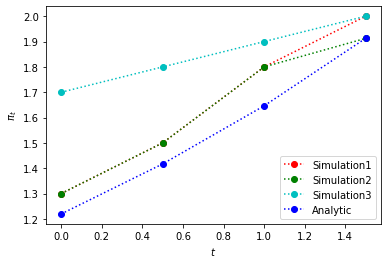

Analytical [1.2195814135422811, 1.4169514480483854, 1.6462627126260398, 1.9126843920556842]
Simulation [1.3 1.5 1.8 2. ]
Simulation2 [1.3        1.5        1.8        1.91268439]
Simulation3 [1.7 1.8 1.9 2. ]


In [25]:
plt.plot(dt,case1_1, 'o:r',label="Simulation1")
plt.plot(dt,case1_2, 'o:g',label="Simulation2")
plt.plot(dt,case1_3, 'o:c',label="Simulation3")
plt.plot(dt,case1, 'o:b',label="Analytic")
plt.ylabel(r"$\pi_t$")
plt.xlabel(r"$t$")
plt.legend()
#plt.savefig('case1.png')

plt.show()


print("Analytical",case1)
print("Simulation",case1_1)
print("Simulation2",case1_2)
print("Simulation3",case1_3)

## Case 2 $p \in (0,1)$

The following is the analytical optimal policy.
<center>$\pi_t^* = \frac{\mu-r}{m\sigma^2} e^{-r(T-t)} - \frac{b\rho}{\sigma}p$</center>

In [26]:
p = 0.5
pi2_opt = [(mu-r)/(m*sigma**2)*np.exp(-r*(T-time)) - (b*rho0/sigma)*p for time in dt]
print(pi2_opt)

[2.0529147468756146, 2.2502847813817186, 2.479596045959373, 2.7460177253890174]


In [28]:
policy = np.sort(np.append(np.arange(1.8,3.2,0.1),pi2_opt))
print(policy)

[1.8        1.9        2.         2.05291475 2.1        2.2
 2.25028478 2.3        2.4        2.47959605 2.5        2.6
 2.7        2.74601773 2.8        2.9        3.         3.1       ]


In [30]:
increment = 0.1
V = np.zeros([len(dt),len(policy)])
V2 = np.zeros([len(dt),len(policy)])
V3 = np.zeros([len(dt),len(policy)])

j = n_step-1 #iterate time
start_time = time.time()
opt = np.empty(0)
opt2 = np.empty(0)
opt3 = np.empty(0)
for start_time in np.flip(dt):
    k = 0 #iterate policy
    for pol in policy:
        policy2 = np.append(pol,opt)
        n_sim = 1000000
        increment = (T-start_time)/10
        t = np.arange(start_time,T,increment)
        policy3 = [(mu-r)/(m*sigma**2)*np.exp(-r*(T-time))- (b*rho0/sigma)*p for time in t[1:]]
        policy3 = np.append(pol,policy3)
        u = np.zeros(n_sim)
        u2 = np.zeros(n_sim)
        u3 = np.zeros(n_sim)
        for i in range(n_sim):
            Y = y
            Y2 = y
            Y3 = y
            for l in range(len(t)):
                W0 = np.random.normal(loc=0, scale=np.sqrt(increment), size=None)
                W1 = np.random.normal(loc=0, scale=np.sqrt(increment), size=None)
                W1 = rho0*W0 + np.sqrt(1-rho0**2)*W1
                pi = policy2[(np.floor(l/len(t)*len(policy2)).astype(int))]
                pi2 = pi2 = policy3[(np.floor(l/(len(t))*len(policy3)).astype(int))]
                Y = Y  +  (r*Y+pi*(mu-r)+eta*p*a)*increment  +  pi*sigma*W1 +  b*p*W0
                Y2 = Y2  +  (r*Y2+pi2*(mu-r)+eta*p*a)*increment  +  pi2*sigma*W1 +  b*p*W0
                Y3 = Y3  +  (r*Y3+pol*(mu-r)+eta*p*a)*increment  +  pol*sigma*W1 +  b*p*W0
            u[i] = U(Y)
            u2[i] = U(Y2)
            u3[i] = U(Y3)
        V[j,k] = np.mean(u)
        V2[j,k] = np.mean(u2)
        V3[j,k] = np.mean(u3)
        k = k+1 #iterate policy
    opt = np.append(policy[np.argmax(V[j,:])],opt)
    opt2 = np.append(policy[np.argmax(V2[j,:])],opt2)
    opt3 = np.append(policy[np.argmax(V3[j,:])],opt3)
    j = j-1 #iterate time
    print(j+1,end=",")    
print("--- %s hours ---" % ((time.time() - timing)/60/60))    

case2 = pi2_opt
case2_1 = opt
case2_2 = opt2
case2_3 = opt3

3,2,1,0,--- 1667806799.633919 seconds ---


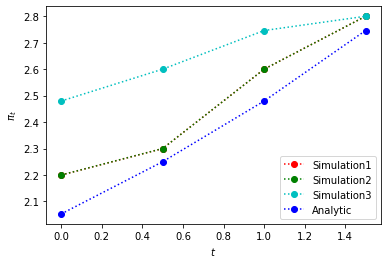

Analytical [2.0529147468756146, 2.2502847813817186, 2.479596045959373, 2.7460177253890174]
Simulation [2.2 2.3 2.6 2.8]
Simulation2 [2.2 2.3 2.6 2.8]
Simulation3 [2.47959605 2.6        2.74601773 2.8       ]


In [31]:
plt.plot(dt,case2_1, 'o:r',label="Simulation1")
plt.plot(dt,case2_2, 'o:g',label="Simulation2")
plt.plot(dt,case2_3, 'o:c',label="Simulation3")
plt.plot(dt,case2, 'o:b',label="Analytic")
plt.ylabel(r"$\pi_t$")
plt.xlabel(r"$t$")
plt.legend()
#plt.savefig('case2.png')
plt.show()


print("Analytical",case2)
print("Simulation",case2_1)
print("Simulation2",case2_2)
print("Simulation3",case2_3)

## Case 3 $p = 1$

The following is the analytical optimal policy.
<center>$\pi_t^* = \frac{\mu-r}{m\sigma^2} e^{-r(T-t)} - \frac{b\rho}{\sigma}$</center>

In [9]:
p = 1
pi2_opt = [(mu-r)/(m*sigma**2)*np.exp(-r*(T-time)) - (b*rho0/sigma) for time in dt]
print(pi2_opt)

[2.886248080208948, 3.083618114715052, 3.3129293792927066, 3.579351058722351]


In [13]:
policy = np.sort(np.append(np.arange(2.8,3.9,0.1),pi2_opt))
print(policy)

[2.8        2.88624808 2.9        3.         3.08361811 3.1
 3.2        3.3        3.31292938 3.4        3.5        3.57935106
 3.6        3.7        3.8       ]


In [14]:
increment = 0.5
V = np.zeros([len(dt),len(policy)])
V2 = np.zeros([len(dt),len(policy)])
V3 = np.zeros([len(dt),len(policy)])

j = n_step-1 #iterate time
timing = time.time()
opt = np.empty(0)
opt2 = np.empty(0)
opt3 = np.empty(0)
for start_time in np.flip(dt):
    k = 0 #iterate policy
    for pol in policy:
        policy2 = np.append(pol,opt)
        n_sim = 2500000
        increment = (T-start_time)/10
        t = np.arange(start_time,T,increment)
        policy3 = np.append(pol,pi2_opt[j+1:])
        u = np.zeros(n_sim)
        u2 = np.zeros(n_sim)
        u3 = np.zeros(n_sim)
        for i in range(n_sim):
            Y = y
            Y2 = y
            Y3 = y
            for l in range(len(t)):
                W0 = np.random.normal(loc=0, scale=np.sqrt(increment), size=None)
                W1 = np.random.normal(loc=0, scale=np.sqrt(increment), size=None)
                W1 = rho0*W0 + np.sqrt(1-rho0**2)*W1
                pi = policy2[(np.floor(l/len(t)*len(policy2)).astype(int))]
                pi2 = policy3[(np.floor(l/(len(t))*len(policy3)).astype(int))]
                Y = Y  +  (r*Y+pi*(mu-r)+eta*p*a)*increment  +  pi*sigma*W1 +  b*p*W0
                Y2 = Y2  +  (r*Y2+pi2*(mu-r)+eta*p*a)*increment  +  pi2*sigma*W1 +  b*p*W0
                Y3 = Y3  +  (r*Y3+pol*(mu-r)+eta*p*a)*increment  +  pol*sigma*W1 +  b*p*W0
            u[i] = U(Y)
            u2[i] = U(Y2)
            u3[i] = U(Y3)
        V[j,k] = np.mean(u)
        V2[j,k] = np.mean(u2)
        V3[j,k] = np.mean(u3)
        k = k+1 #iterate policy
    opt = np.append(policy[np.argmax(V[j,:])],opt)
    opt2 = np.append(policy[np.argmax(V2[j,:])],opt2)
    opt3 = np.append(policy[np.argmax(V3[j,:])],opt3)
    j = j-1 #iterate time
    print(j+1,end=",")    
print("--- %s hours ---" % ((time.time() - timing)/60/60))  

case3 = pi2_opt
case3_1 = opt
case3_2 = opt2
case3_3 = opt3

3,2,1,0,--- 5.88932170662615 hours ---


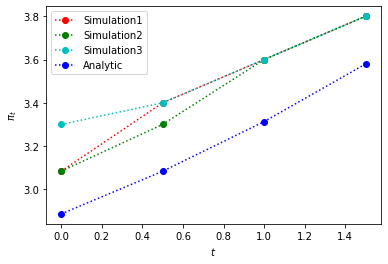

Analytical [2.886248080208948, 3.083618114715052, 3.3129293792927066, 3.579351058722351]
Simulation [3.08361811 3.4        3.6        3.8       ]
Simulation2 [3.08361811 3.3        3.6        3.8       ]
Simulation3 [3.3 3.4 3.6 3.8]


In [15]:
plt.plot(dt,case3_1, 'o:r',label="Simulation1")
plt.plot(dt,case3_2, 'o:g',label="Simulation2")
plt.plot(dt,case3_3, 'o:c',label="Simulation3")
plt.plot(dt,case3, 'o:b',label="Analytic")
plt.ylabel(r"$\pi_t$")
plt.xlabel(r"$t$")
plt.legend()
#plt.savefig('case3.png')
plt.show()



print("Analytical",case3)
print("Simulation",case3_1)
print("Simulation2",case3_2)
print("Simulation3",case3_3)